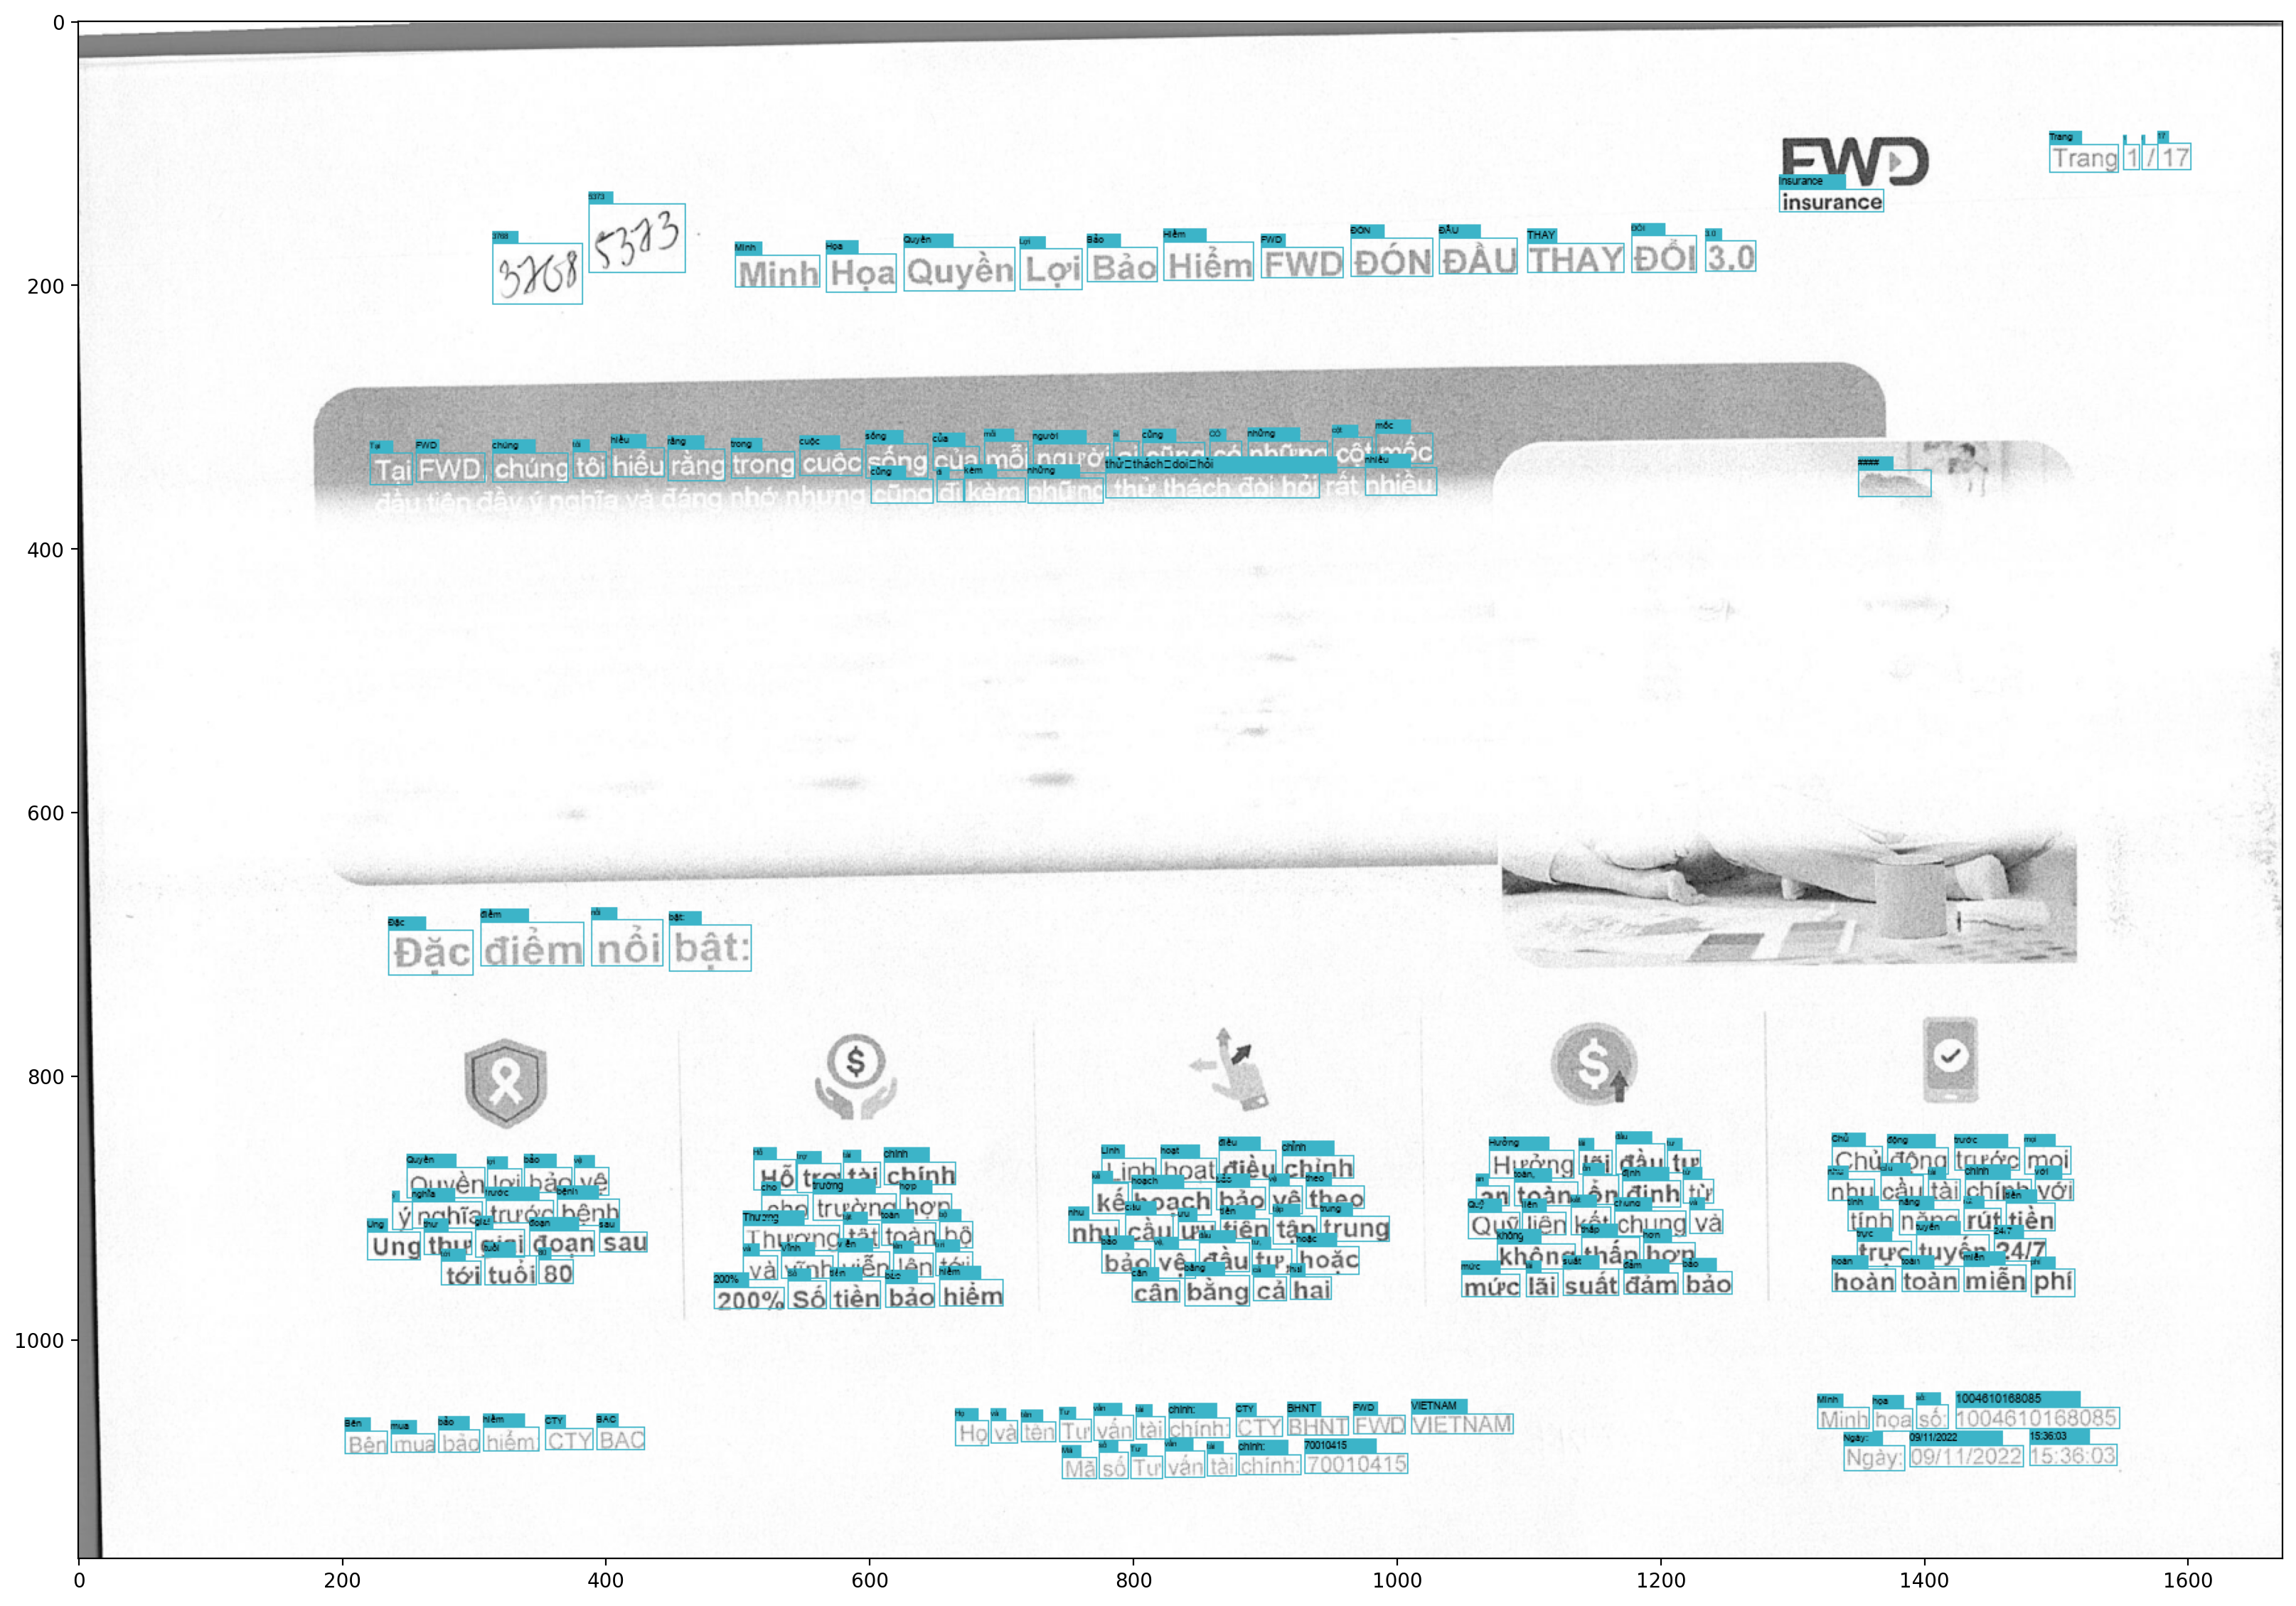

In [2]:
from PIL import ImageFont, ImageDraw, Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from externals.ocr.utils import read_ocr_result_from_txt, visualize_bbox_and_label
# img_path = "/mnt/hdd2T/AICR/Projects/2023/FWD/Forms/Images/02_2023/TXN/37102252_01_0.png"
# ocr_path = "/mnt/ssd500/hungbnt/DocumentClassification/results/ocr/FWD/202302_3forms/TXN/37102252_01_0.txt"
# img_path = "/mnt/hdd2T/AICR/Projects/2023/FWD/Forms/Images/02_2023/TXN/35981136_01_0.png"
# ocr_path = "/mnt/ssd500/hungbnt/DocumentClassification/results/ocr/FWD/202302_3forms/TXN/35981136_01_0.txt"
img_path = "/mnt/hdd2T/AICR/Projects/2023/FWD/Forms/Images/02_2023/BMH_UL/7_PDFsam_Scan_0.png"
ocr_path = "/mnt/ssd500/hungbnt/DocumentClassification/results/ocr/FWD/202302_3forms/BMH_UL/7_PDFsam_Scan_0.txt"
bboxes, texts = read_ocr_result_from_txt(ocr_path)
img = cv2.imread(img_path)
img = visualize_bbox_and_label(img, bboxes, texts, is_vnese=True, draw_text=True)
plt.figure(figsize=(20,20), dpi=200)
plt.imshow(img)
plt.show()


In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
from transformers import AutoModel, AutoTokenizer
import torch
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")


Downloading:   0%|          | 0.00/557 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/895k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [11]:
encoding = tokenizer("Mong một ngày mai bình minh", truncation=True)
encoding

In [13]:
tokenizer.save_pretrained("/mnt/ssd500/hungbnt/DocumentClassification/weights/lilt/phobert_tokebizer")

('/mnt/ssd500/hungbnt/DocumentClassification/weights/lilt/phobert_tokebizer/tokenizer_config.json',
 '/mnt/ssd500/hungbnt/DocumentClassification/weights/lilt/phobert_tokebizer/special_tokens_map.json',
 '/mnt/ssd500/hungbnt/DocumentClassification/weights/lilt/phobert_tokebizer/vocab.txt',
 '/mnt/ssd500/hungbnt/DocumentClassification/weights/lilt/phobert_tokebizer/bpe.codes',
 '/mnt/ssd500/hungbnt/DocumentClassification/weights/lilt/phobert_tokebizer/added_tokens.json')

In [4]:
from transformers import LayoutLMv3Processor
processor = LayoutLMv3Processor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)
processor.save_pretrained("/mnt/ssd500/hungbnt/DocumentClassification/weights/layoutlmv3/processor")




Downloading:   0%|          | 0.00/275 [00:00<?, ?B/s]

/home/sds/miniconda3/envs/hungbnt_kie_no_mmocr/lib/python3.9/site-packages/transformers/models/layoutlmv3/feature_extraction_layoutlmv3.py:30: FutureWarning: The class LayoutLMv3FeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use LayoutLMv3ImageProcessor instead.
  warnings.warn(


Downloading:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [6]:
from transformers import LayoutLMv3ForSequenceClassification
DOC_LABELS = ['POS01', 'POS02', 'POS03', 'POS04', 'POS05', 'POS06', 'POS08', "DCYCBH",
              "GUQ1", "GUQ2", "QLBH", "QLBHYT", "TDDG", "TKSK", "TTTK", "XNDY", "YCBH"]
model = LayoutLMv3ForSequenceClassification.from_pretrained("microsoft/layoutlmv3-base", num_labels=len(DOC_LABELS))
model.save_pretrained("/mnt/ssd500/hungbnt/DocumentClassification/weights/layoutlmv3/pretrained")

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of LayoutLMv3ForSequenceClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [2]:
from transformers import LayoutXLMTokenizer, LayoutLMv2FeatureExtractor, LayoutXLMProcessor
tokenizer = LayoutXLMTokenizer.from_pretrained("microsoft/layoutxlm-base")
tokenizer.save_pretrained("/mnt/ssd500/hungbnt/DocumentClassification/weights/layoutxlm/tokenizer")


('/mnt/ssd500/hungbnt/DocumentClassification/weights/layoutxlm/tokenizer/tokenizer_config.json',
 '/mnt/ssd500/hungbnt/DocumentClassification/weights/layoutxlm/tokenizer/special_tokens_map.json',
 '/mnt/ssd500/hungbnt/DocumentClassification/weights/layoutxlm/tokenizer/sentencepiece.bpe.model',
 '/mnt/ssd500/hungbnt/DocumentClassification/weights/layoutxlm/tokenizer/added_tokens.json')

In [ ]:
from transformers import LayoutLMv2ForSequenceClassification
DOC_LABELS = ['POS01', 'POS02', 'POS03', 'POS04', 'POS05', 'POS06', 'POS08', "DCYCBH",
              "GUQ1", "GUQ2", "QLBH", "QLBHYT", "TDDG", "TKSK", "TTTK", "XNDY", "YCBH"]
model = LayoutLMv2ForSequenceClassification.from_pretrained("microsoft/layoutxlm-base", num_labels=len(DOC_LABELS), local_files_only=False)
# model.save_pretrained("/mnt/ssd500/hungbnt/DocumentClassification/weights/layoutxlm/pretrained")

In [10]:
model.save_pretrained("/mnt/ssd500/hungbnt/DocumentClassification/weights/layoutxlm/pretrained")

In [1]:
from src.models.lilt.load_data import CustomDataset, load_train_eval_df, collate_fn
from config.lilt_base import LILT_CFG
df_path = LILT_CFG["data"]["df_path"]
pretrained_tokenizer_path = LILT_CFG["data"]["pretrained_tokenizer_path"]
max_seq_len = LILT_CFG["data"]["max_seq_len"]
labels = LILT_CFG["data"]["labels"]



In [2]:
from transformers import PhobertTokenizer
tokenizer = PhobertTokenizer.from_pretrained(pretrained_tokenizer_path)

In [3]:
import pandas as pd
df = pd.read_csv(df_path, index_col=None)
dataset = CustomDataset(df, tokenizer, max_seq_len, labels)

In [4]:
example = dataset[0]


In [5]:
tokenizer.decode(example["input_ids"])


'<s> insurance Công ty TNHH Bảo hiểm Nhân thọ FWD Việt Nam Mẫu số: NBU-WSIG_2022.09 XÁC NHÂN ĐỒNG Ý SỞ DỤNG HỒ SƠ YÊU CẦU BẢO HIỂM ĐIỆN TỬ VÀ GIAO DỊCH ĐIỆN TỬ Kính gửi: Công ty TNHH Bảo hiểm Nhân thọ FWD Việt Nam ("FWD Việt Nam") Bên mua bảo hiểm: Trinh Văn Quyết Số Hợp đồng: 1 12345678 Số giấy tờ tùy thân: 11 170028487010 Số HSYCBH: Số điện thoại xác thực OTP: 10 0186617767 Email: quyết(a samsang com Lưu ý: Các thông tin Số CMND/CCCD/Hộ chiếu, Email liên lạc và Số điện thoại xác thực OTP được kê khai trên Xác nhận này phải là các thông tin được đăng ký và cung cấp trong HSYCBH. Bằng việc ký tên dưới đây, Tôi/Chúng tôi - những người có tên và thông tin ghi trong HSYCBH/Hợp đồng có số hiệu nêu trên, cùng xác nhận đã được Tư vấn tài chính giải thích, hiểu và đồng ý với tất cả các nội dung dưới đây: b 1 Tôi/Chúng tôi có nhu cầu tham gia bảo hiểm trên tinh thần tự nguyện, đã đọc và được nghe Tư vấn tài chính giải thích về qui trình giao dịch điện tử qua ứng dụng/trên trang "FWD SMART" của

In [6]:
for id, box in zip(example["input_ids"], example["bbox"]):
    print(tokenizer.decode([id]), box)

<s> [0, 0, 0, 0]
insu@@ [782, 123, 871, 135]
rance [782, 123, 871, 135]
Công [66, 133, 416, 147]
ty [66, 133, 416, 147]
TNHH [66, 133, 416, 147]
Bảo [66, 133, 416, 147]
hiểm [66, 133, 416, 147]
Nhân [66, 133, 416, 147]
thọ [66, 133, 416, 147]
F@@ [66, 133, 416, 147]
WD [66, 133, 416, 147]
Việt [66, 133, 416, 147]
Nam [66, 133, 416, 147]
Mẫu [65, 147, 122, 158]
số@@ [65, 147, 122, 158]
: [65, 147, 122, 158]
N@@ [125, 148, 268, 159]
B@@ [125, 148, 268, 159]
U-@@ [125, 148, 268, 159]
W@@ [125, 148, 268, 159]
SI@@ [125, 148, 268, 159]
G@@ [125, 148, 268, 159]
_@@ [125, 148, 268, 159]
20@@ [125, 148, 268, 159]
22.0@@ [125, 148, 268, 159]
9 [125, 148, 268, 159]
X@@ [402, 175, 533, 195]
Á@@ [402, 175, 533, 195]
C [402, 175, 533, 195]
NHÂN [402, 175, 533, 195]
Đ@@ [99, 197, 882, 218]
ỒNG [99, 197, 882, 218]
Ý [99, 197, 882, 218]
S@@ [99, 197, 882, 218]
Ở [99, 197, 882, 218]
D@@ [99, 197, 882, 218]
Ụ@@ [99, 197, 882, 218]
NG [99, 197, 882, 218]
H@@ [99, 197, 882, 218]
Ồ [99, 197, 882, 218]
S@@ 

In [7]:
from torch.utils.data import DataLoader
from functools import partial
collate_fn_default = partial(collate_fn, max_seq_len=512, tokenizer=tokenizer)
train_dataloader = DataLoader(dataset, batch_size=4, collate_fn=collate_fn_default, num_workers=1)


In [8]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)
tokenizer.decode(batch["input_ids"][0])


input_ids torch.Size([4, 512])
token_type_ids torch.Size([4, 512])
attention_mask torch.Size([4, 512])
bbox torch.Size([4, 512, 4])
labels torch.Size([4])


'<s> insurance Công ty TNHH Bảo hiểm Nhân thọ FWD Việt Nam Mẫu số: NBU-WSIG_2022.09 XÁC NHÂN ĐỒNG Ý SỞ DỤNG HỒ SƠ YÊU CẦU BẢO HIỂM ĐIỆN TỬ VÀ GIAO DỊCH ĐIỆN TỬ Kính gửi: Công ty TNHH Bảo hiểm Nhân thọ FWD Việt Nam ("FWD Việt Nam") Bên mua bảo hiểm: Trinh Văn Quyết Số Hợp đồng: 1 12345678 Số giấy tờ tùy thân: 11 170028487010 Số HSYCBH: Số điện thoại xác thực OTP: 10 0186617767 Email: quyết(a samsang com Lưu ý: Các thông tin Số CMND/CCCD/Hộ chiếu, Email liên lạc và Số điện thoại xác thực OTP được kê khai trên Xác nhận này phải là các thông tin được đăng ký và cung cấp trong HSYCBH. Bằng việc ký tên dưới đây, Tôi/Chúng tôi - những người có tên và thông tin ghi trong HSYCBH/Hợp đồng có số hiệu nêu trên, cùng xác nhận đã được Tư vấn tài chính giải thích, hiểu và đồng ý với tất cả các nội dung dưới đây: b 1 Tôi/Chúng tôi có nhu cầu tham gia bảo hiểm trên tinh thần tự nguyện, đã đọc và được nghe Tư vấn tài chính giải thích về qui trình giao dịch điện tử qua ứng dụng/trên trang "FWD SMART" của

In [15]:
from transformers import LiltForSequenceClassification
from config.global_var import DOC_LABELS
id2label = {id: label for id, label in enumerate(labels)}
label2id = {label: id for id, label in enumerate(labels)}
# model = LiltForSequenceClassification.from_pretrained("phanhoang/lilt-phobert-base", id2label=id2label, label2id=label2id)
model = LiltForSequenceClassification.from_pretrained("phanhoang/lilt-phobert-base", num_labels=len(DOC_LABELS))

Some weights of the model checkpoint at phanhoang/lilt-phobert-base were not used when initializing LiltForSequenceClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing LiltForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LiltForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LiltForSequenceClassification were not initialized from the model checkpoint at phanhoang/lilt-phobert-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able

In [14]:
model.save_pretrained("/mnt/ssd500/hungbnt/DocumentClassification/weights/lilt/pretrained")